In [ ]:
from google.colab import drive
import os, sys

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 드라이브 접근
%cd /content/drive/MyDrive/

# 미션 수행을 위한 폴더 생성
!mkdir -p Mission1

Mounted at /content/drive
/content/drive/MyDrive


# Mission 1: 패션 스타일 이미지 분류

## Mission 1-1

<strong>
1. “{W/T}_{이미지ID}_{시대별}_{스타일별}_{성별}.jpg”형식으로 저장된 데이터셋을 분류하여 정리한다. <br>
2. 분류는 성별&스타일 별 데이터의 개수로 한다. <br>
3. Train과 Validation에 대하여 각각 통계치를 작성한다.
</strong>

In [ ]:
import os
import pandas as pd
from IPython.display import display, display_html

# 파일 리스트(원본 이미지 데이터셋 경로)
training_image_list = os.listdir('dataset/origin_dataset/training_image')
validation_image_list = os.listdir('dataset/origin_dataset/validation_image')

# train과 validation 데이터셋의 이미지 수를 확인
print(f"train image: {len(training_image_list)}, validation image: {len(validation_image_list)}")

# 파일리스트 -> 메타데이터 Pandas 객체
def path2data(image_list):
    data = []
    for i in range(len(image_list)):
        meta_data = image_list[i].split('_')

        row = {
            'file_name': image_list[i][:-4],    # ".jpg"를 제외한 전체 파일명
            'wt': meta_data[0],
            'image_id': meta_data[1],
            'time': meta_data[2],
            'style': meta_data[3],
            'gender': meta_data[4][0]
        }
        data.append(row)
    return pd.DataFrame(data)

# 변환 적용
training_df = path2data(training_image_list)
validation_df = path2data(validation_image_list)

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)

# 결과 확인
display_left(training_df.head(), validation_df.head())

# 결과 저장
training_df.to_csv('Mission1/training_df.csv', index=False)
validation_df.to_csv('Mission1/validation_df.csv', index=False)

train image: 4070, validation image: 951


,file_name,wt,image_id,time,style,gender
0,W_13846_60_minimal_W,W,13846,60,minimal,W
1,W_15811_10_sportivecasual_M,W,15811,10,sportivecasual,M
2,W_14489_19_normcore_W,W,14489,19,normcore,W
3,W_12533_80_bold_M,W,12533,80,bold,M
4,W_16836_19_normcore_M,W,16836,19,normcore,M
,file_name,wt,image_id,time,style,gender
0,W_11610_90_grunge_W,W,11610,90,grunge,W
1,W_38588_19_genderless_W,W,38588,19,genderless,W
2,W_47169_70_hippie_W,W,47169,70,hippie,W
3,W_02498_50_feminine_W,W,02498,50,feminine,W


In [ ]:
# 메타 정보 가공
training_count_data = training_df[['gender', 'style', 'image_id']].groupby(['gender', 'style']).count()
validation_count_data = validation_df[['gender', 'style', 'image_id']].groupby(['gender', 'style']).count()

# 출력 데이터 컬럼이름 수정
training_count_data.rename(columns={'image_id': 'training count'}, inplace=True)
validation_count_data.rename(columns={'image_id': 'validation count'}, inplace=True)

# 결과 확인
display_left(training_count_data, validation_count_data)

# 데이터 저장
training_count_data.to_csv('Mission1/training_count_data.csv')
validation_count_data.to_csv('Mission1/validation_count_data.csv')

training count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 268 
 
 
 hiphop 
 274 
 
 
 hippie 
 260 
 
 
 ivy 
 237 
 
 
 metrosexual 
 278 
 
 
 mods 
 269 
 
 
 normcore 
 364 
 
 
 sportivecasual 
 298 
 
 
 W 
 athleisure 
 67 
 
 
 bodyconscious 
 95 
 
 
 cityglam 
 67 
 
 
 classic 
 77 
 
 
 disco 
 37 
 
 
 ecology 
 64 
 
 
 feminine 
 154 
 
 
 genderless 
 77 
 
 
 grunge 
 31 
 
 
 hiphop 
 48 
 
 
 hippie 
 91 
 
 
 kitsch 
 91 
 
 
 lingerie 
 55 
 
 
 lounge 
 45 
 
 
 military 
 33 
 
 
 minimal 
 139 
 
 
 normcore 
 153 
 
 
 oriental 
 78 
 
 
 popart 
 41 
 
 
 powersuit 
 120 
 
 
 punk 
 65 
 
 
 space 
 37 
 
 
 sportivecasual 
 157 
 
 
 
 
 
 
 
 validation count 
 
 
 gender 
 style 
 
 
 
 
 
 M 
 bold 
 57 
 
 
 hiphop 
 66 
 
 
 hippie 
 82 
 
 
 ivy 
 79 
 
 
 metrosexual 
 58 
 
 
 mods 
 80 
 
 
 normcore 
 51 
 
 
 sportivecasual 
 52 
 
 
 W 
 athleisure 
 14 
 
 
 bodyconscious 
 23 
 
 
 cityglam 
 18 
 
 
 classic 
 22 
 
 
 disco 
 10 
 
 
 ecology 
 17 
 
 
 feminine 
 44 
 
 
 genderless 
 12 
 
 
 grunge 
 10 
 
 
 hiphop 
 8 
 
 
 hippie 
 14 
 
 
 kitsch 
 22 
 
 
 lingerie 
 5 
 
 
 lounge 
 8 
 
 
 military 
 9 
 
 
 minimal 
 35 
 
 
 normcore 
 20 
 
 
 oriental 
 18 
 
 
 popart 
 8 
 
 
 powersuit 
 34 
 
 
 punk 
 12 
 
 
 space 
 15 
 
 
 sportivecasual 
 48

### 추가 분석

> (1) 스타일별 데이터 분석

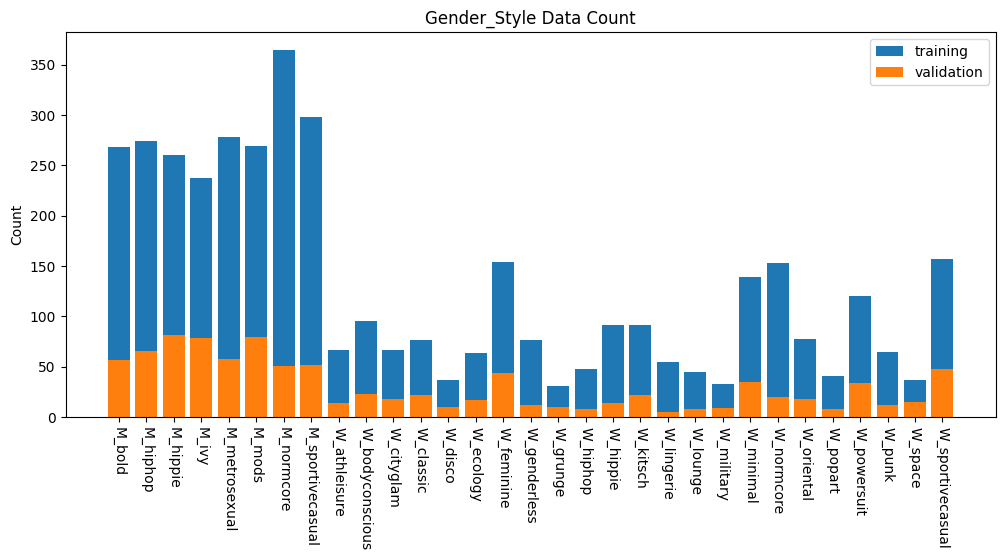

In [ ]:
import matplotlib.pyplot as plt

# Group화 된 데이터를 다시 데이터프레임으로 변환
training_count_data_re = training_count_data.reset_index()
validation_count_data_re = validation_count_data.reset_index()

# 겹치는 스타일이 있음으로 Gender와 Style결합
training_count_data_re['name'] = training_count_data_re['gender'] + '_' + training_count_data_re['style']
validation_count_data_re['name'] = validation_count_data_re['gender'] + '_' + validation_count_data_re['style']

# 시각화
plt.figure(figsize=(12, 5))
plt.title('Gender_Style Data Count')
plt.ylabel('Count')
plt.xticks(rotation=270)
plt.bar(training_count_data_re['name'], training_count_data_re['training count'], label="training")
plt.bar(validation_count_data_re['name'], validation_count_data_re['validation count'], label="validation")

plt.legend()
plt.savefig('Mission1/gender_style_data_count.png', bbox_inches='tight')    # 이미지 저장
plt.show()

> (2) 연도별 데이터 분석

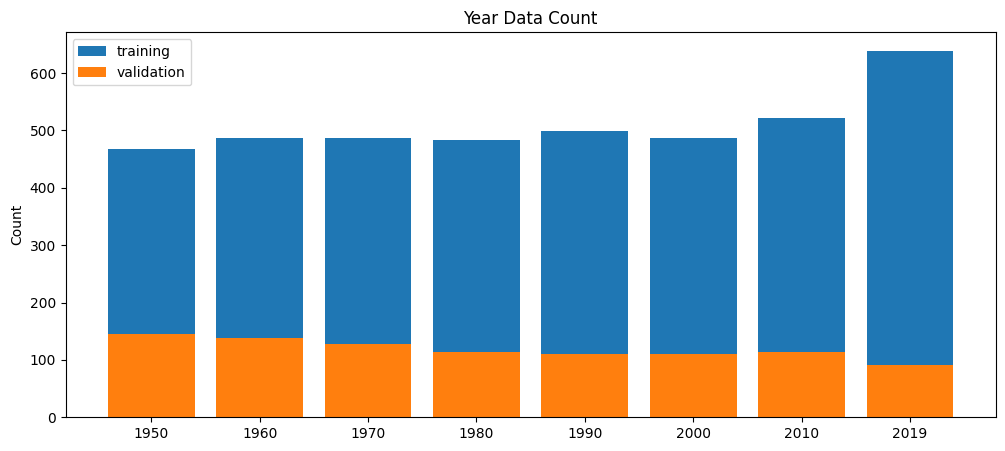

In [ ]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 복사
training_df_tt = training_df.copy()
validation_df_tt = validation_df.copy()

# 시간 그룹화를 위한 00 -> 2000, 80 -> 1980 변환
def time2year(time):
    g20 = ['00', '10', '19']
    if time in g20:
        return '20' + time
    else:
        return '19' + time

training_df_tt['time'] = training_df_tt['time'].apply(time2year)
validation_df_tt['time'] = validation_df_tt['time'].apply(time2year)

# 시간 데이터로 그룹화
training_by_year = training_df_tt.groupby('time').count()
validation_by_year = validation_df_tt.groupby('time').count()

# 시각화
plt.figure(figsize=(12, 5))
plt.title('Year Data Count')
plt.ylabel('Count')
plt.bar(training_by_year.index, training_by_year['image_id'], label="training")
plt.bar(validation_by_year.index, validation_by_year['image_id'], label="validation")

plt.legend()
plt.savefig('Mission1/year_data_count.png', bbox_inches='tight')    # 이미지 저장
plt.show()

> (3) 이미지ID가 중복인 데이터 존재 확인<br>
- `이미지 ID`는 동일한데, 나머지 속성값이 다른 데이터가 일부 존재함을 확인

In [ ]:
import matplotlib.pyplot as plt

# 중복된 image_id 찾기
training_duplicates = training_df[training_df.duplicated(['image_id'], keep=False)]
validation_duplicates = validation_df[validation_df.duplicated(['image_id'], keep=False)]

# 중복된 데이터 출력
training_duplicates.sort_values(by=['image_id'])
validation_duplicates.sort_values(by=['image_id'])

# 결과 확인
display_left(training_duplicates, validation_duplicates)

,file_name,wt,image_id,time,style,gender
1189,W_17802_80_bold_M,W,17802,80,bold,M
2336,T_02958_19_normcore_M,T,02958,19,normcore,M
2501,T_09717_19_genderless_W,T,09717,19,genderless,W
2502,W_10028_50_classic_W,W,10028,50,classic,W
2534,T_10028_10_sportivecasual_W,T,10028,10,sportivecasual,W
2867,W_09717_19_normcore_W,W,09717,19,normcore,W
3638,T_17802_19_normcore_M,T,17802,19,normcore,M
3761,W_02958_60_mods_M,W,02958,60,mods,M
,file_name,wt,image_id,time,style,gender


## Mission 1-2

<strong>
1. “ResNet18를 활용하여 성별&스타일 단위로 클래스 분류를 수행한다. <br>
2. parameters는 무작위로 초기화하여 사용하며, pretrained weights를 사용할 수 없다. <br>
3. 성능 향상을 위해 다양한 전처리 기법을 활용해도 무관하다.
</strong>

In [ ]:
# 필요 라이브러리 import
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import random
import numpy as np

# 모델 재현을 위한 랜덤시드 고정
def set_random_seed(seed_value=42):
    # Python의 기본 난수 시드 설정
    random.seed(seed_value)
    # NumPy 난수 시드 설정
    np.random.seed(seed_value)
    # PyTorch 난수 시드 설정 (CPU)
    torch.manual_seed(seed_value)
    # PyTorch 난수 시드 설정 (GPU)
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)


    # CuDNN 설정
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_random_seed()

### 1. 데이터 메타데이터 처리
**1. 파일명에서 특징을 추출하고 라벨을 숫자값으로 변환한 데이터를 pandas로 저장한다**  
**2. JSON으로 라벨과 매칭되는 숫자값에 대한 맵을 저장한다.**

In [ ]:
################################################################################
# Preprocessing Metadata
################################################################################
import json
import pandas as pd
from IPython.display import display, display_html

# 파일 리스트
training_image_list = os.listdir('dataset/origin_dataset/training_image')
validation_image_list = os.listdir('dataset/origin_dataset/validation_image')

# 파일리스트 -> 메타데이터 Pandas 객체
def path2data(image_list):
    data = []
    for i in range(len(image_list)):
        meta_data = image_list[i].split('_')

        wt = meta_data[0]
        image_id = meta_data[1]
        time = meta_data[2]
        style = meta_data[3]
        gender = meta_data[4][0]

        row = {
            'wt': wt,
            'image_id': image_id,
            'time': time,
            'style': style,
            'gender': gender,
            'image_name': image_list[i]
        }
        data.append(row)
    return pd.DataFrame(data)

# 변환 적용
training_df = path2data(training_image_list)
validation_df = path2data(validation_image_list)

# 학습을 위한 라벨 합치기
training_df['label_name'] = training_df['gender'] + '_' + training_df['style']
validation_df['label_name'] = validation_df['gender'] + '_' + validation_df['style']

# 결과 보기 좋게 HTML편집
def display_left(*args):
    html_str = ''
    for df in args:
        html_str += f'<div style="margin-right:30px;">{df.to_html()}</div>'
    display_html(f'<div style="display: flex;">{html_str}</div>', raw=True)


# 양방향 라벨링 맵 생성
label_map = {}
for idx, label in enumerate(training_df['label_name'].unique()):
    label_map[label] = idx
    label_map[idx] = label


# 라벨 적용
training_df['label'] = training_df['label_name'].map(label_map)
validation_df['label'] = validation_df['label_name'].map(label_map)

# 결과 확인
display_left(training_df.head(), validation_df.head())
print(len(training_df), len(validation_df))

# 라벨 저장
training_df.to_csv('dataset/training_image_labels.csv', index=False)
validation_df.to_csv('dataset/validation_image_labels.csv', index=False)

# 라벨 맵 저장
with open('dataset/label_map.json', 'w') as f:
    json.dump(label_map, f)

# 테스트 출력
print(f"{label_map[0]}, {label_map['W_minimal']}")

,wt,image_id,time,style,gender,image_name,label_name,label
0,W,13846,60,minimal,W,W_13846_60_minimal_W.jpg,W_minimal,0
1,W,15811,10,sportivecasual,M,W_15811_10_sportivecasual_M.jpg,M_sportivecasual,1
2,W,14489,19,normcore,W,W_14489_19_normcore_W.jpg,W_normcore,2
3,W,12533,80,bold,M,W_12533_80_bold_M.jpg,M_bold,3
4,W,16836,19,normcore,M,W_16836_19_normcore_M.jpg,M_normcore,4
,wt,image_id,time,style,gender,image_name,label_name,label
0,W,11610,90,grunge,W,W_11610_90_grunge_W.jpg,W_grunge,30
1,W,38588,19,genderless,W,W_38588_19_genderless_W.jpg,W_genderless,26
2,W,47169,70,hippie,W,W_47169_70_hippie_W.jpg,W_hippie,12
3,W,02498,50,feminine,W,W_02498_50_feminine_W.jpg,W_feminine,6


4070 951
W_minimal, 0


### 2. 데이터 전처리
**1. 데이터를 ReSize합니다.**  
**2. Colab과 Google Drive 사이의 I/O성능이 매우 떨어져서 하나씩 파일을 처리시 매우 속도가 느렸기에, Multi Thread처리를 하여 이를 보완했습니다.**  
**3. 학습때마다 이미지 I/O성능을 고려해서 이미지 파일들을 모두 Tensor파일로 변환하여 저장하여 불러오기 쉽게 만들었습니다.**


In [ ]:
################################################################################
# Preprocessing File
################################################################################

import os
import torch
from torchvision import transforms
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# 변환 처리
def process_single_image(args):
    image_name, label, image_dir, transform = args
    image_path = os.path.join(image_dir, image_name)
    try:
        # 이미지 불러오기
        image = Image.open(image_path).convert('RGB')
        # 이미지 전처리
        image = transform(image)
        return image, label
    except Exception as e:
        print(f"Error processing {image_name}: {e}")
        return None


# 변환 멀티스레드 처리
def process_images_parallel(metadata_df, image_dir, transform, cpu):
    inputs = [(row['image_name'], row['label'], image_dir, transform) for idx, row in metadata_df.iterrows()]
    images = []
    labels = []

    # Thread Pool 생성
    with ThreadPoolExecutor(max_workers=min(cpu, os.cpu_count())) as executor:
        # executer 에게 작업 할당 및 취합
        results = list(tqdm(executor.map(process_single_image, inputs), total=len(inputs)))

    for result in results:
        if result is not None:
            image, label = result
            images.append(image)
            labels.append(label)

    # 이미지 리스트가 비어있는지 확인
    if not images:
        raise ValueError("No images were processed successfully.")

    images = torch.stack(images)
    labels = torch.tensor(labels, dtype=torch.long)
    return images, labels


# 총 전처리 파이프라인
def preprocess_image_to_tensor_pipeline(train_image_dir, val_image_dir, tensor_dir, train_transform, test_transform, cpu=8):
    # 필요한 폴더 생성
    os.makedirs(tensor_dir, exist_ok=True)

    # 메타데이터 불러오기
    training_metadata_df = pd.read_csv('dataset/training_image_labels.csv')
    validation_metadata_df = pd.read_csv('dataset/validation_image_labels.csv')

    # 학습 데이터 처리 및 저장
    print("Train Data Preprocessing")
    train_images, train_labels = process_images_parallel(training_metadata_df, train_image_dir, train_transform, cpu=cpu)
    torch.save((train_images, train_labels), os.path.join(tensor_dir, 'train.pt'))

    # 검증 데이터 처리 및 저장
    print("Validation Data Preprocessing")
    val_images, val_labels = process_images_parallel(validation_metadata_df, val_image_dir, test_transform, cpu=cpu)
    torch.save((val_images, val_labels), os.path.join(tensor_dir, 'val.pt'))

    print("Preprocessing Complete")

In [ ]:
# 가용 자원수 출력 (경험적으로 L4 GPU 런타임 사용이 적절함. 12개)
os.cpu_count()

12

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

!mkdir -p dataset/tensor

# 데이터 전처리 파이프라인 실행 (L4 인스턴스를 사용해야 원활한 실행 가능 8개)
preprocess_image_to_tensor_pipeline(
    # 이미지 데이터 저장 경로
    train_image_dir = 'dataset/origin_dataset/training_image',
    val_image_dir = 'dataset/origin_dataset/validation_image',
    # 텐서 파일 저장경로
    tensor_dir = 'dataset/tensor/resize_tensor',
    # 변환기 지정
    train_transform = transform,
    test_transform = transform,
    # 가용 코어 수 (보유 자원과 동일하게 할경우에 멈출 수 있어서 낮게함.)
    cpu=8
)

Train Data Preprocessing


  0%|          | 0/4070 [00:00<?, ?it/s]

Validation Data Preprocessing


  0%|          | 0/951 [00:00<?, ?it/s]

Preprocessing Complete


### 3. 데이터 로드
**1. 랜덤으로 적용되는 증강의 경우 매 epoch마다 다르게 증강을 이용 할 수 있도록 커스텀 데이터셋에 동적으로 증강을 할 수 있도록 만들었다.**  

In [ ]:
# GPU 사용
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
################################################################################
# Data Load
################################################################################

from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# 매 스텝마다 증강을 달리 하기위한 커스텀 데이터셋 정의
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        if self.transform:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

def data_loading(tensor_dir, batch_size, train_transform, val_transform):
    """
    tensor_dir: 텐서 파일 경로
    batch_size: 배치 사이즈
    train_transform: 학습 데이터 변환기
    val_transform: 검증 데이터 변환기
    """

    # 데이터 불러오기
    train_images, train_labels = torch.load(os.path.join(tensor_dir, 'train.pt'), weights_only=False)
    val_images, val_labels = torch.load(os.path.join(tensor_dir, 'val.pt'), weights_only=False)

    # 데이터 셋 생성
    train_dataset = CustomDataset(train_images, train_labels, transform=train_transform)
    val_dataset = CustomDataset(val_images, val_labels, transform=val_transform)

    # 데이터 로드
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True) # [3] Pin-Memory
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

    # 데이터 확인
    print(f"Train Dataset: {len(train_dataset)}, Val Dataset: {len(val_dataset)}")

    return train_loader, val_loader

### 4. 모델 학습
**1. 학습동안 가장 좋은 성능의 모델이 저장되도록 했습니다.**  
**2. 학습의 Overfitting, Local Minimum 등을 확인하기 위해 학습 추이 그래프르 출력하도록 했습니다.**  
**3. 모델학습엔 선택적으로 스케줄러를 사용할 수 있게 했습니다.**  

In [ ]:
################################################################################
# Training
################################################################################

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange


def training(experiment_name, save_dir, data_loader, optimizer, criterion, scheduler=None):
    """
    experiment_name: 실험 이름
    save_dir: 모델 저장 경로
    data_loader: 데이터로더
    optimizer: 옵티마이저
    criterion: 손실 함수
    batch_size: 배치 사이즈
    scheduler: 스케줄러
    """

    train_loader, val_loader = data_loader



    os.makedirs(save_dir, exist_ok=True)
    os.makedirs(os.path.join(save_dir, experiment_name), exist_ok=True)

    train_loss_chart = []
    val_loss_chart = []

    train_acc_chart = []
    val_acc_chart = []

    for epoch in trange(NUM_EPOCHS):
        model.train()

        train_loss = 0
        train_correct = 0
        total = 0
        for images, labels in tqdm(train_loader, leave=False):
            images, labels = images.to(device), labels.to(device)
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True) # [4] 비동기 메모리 전송


            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_loss /= len(train_loader)
        train_acc = 100 * train_correct / total

        train_loss_chart.append(train_loss)
        train_acc_chart.append(train_acc)

        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")


        model.eval()
        val_loss = 0
        val_correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, leave=False):
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

            val_loss /= len(val_loader)
            val_acc = 100 * val_correct / total

        # BestModel
        if epoch == 0 or val_acc > max(val_acc_chart):
            if experiment_name == 'best_acc_exp':
                torch.save(model.state_dict(), f'{save_dir}/{experiment_name}/best_acc_model.pth')
            elif experiment_name == 'best_loss_exp':
                torch.save(model.state_dict(), f'{save_dir}/{experiment_name}/best_loss_model.pth')
            else:
                torch.save(model.state_dict(), f'{save_dir}/{experiment_name}/best_model.pth')

        val_loss_chart.append(val_loss)
        val_acc_chart.append(val_acc)

        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # 가중치 스케줄러 업데이트
        if scheduler is not None:
            scheduler.step()

        # 모델 중간 저장
        if epoch+1 >= 20 and (epoch+1) % 5 == 0:
            torch.save(model.state_dict(), f'{save_dir}/{experiment_name}/model_{epoch+1}.pth')
            print(f"Model saved at epoch -> {epoch+1}")

    # 학습 loss, acc 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_chart, label='Train Loss')
    plt.plot(val_loss_chart, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_chart, label='Train Accuracy')
    plt.plot(val_acc_chart, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.grid(True)

    plt.tight_layout()

    # 학습 시각화 저장
    plt.savefig(f'{save_dir}/{experiment_name}/train_visualization.png')
    plt.show()

    # 학습 과정 표
    display(pd.DataFrame({
        'epoch': range(1, NUM_EPOCHS+1),
        'Train Acc': train_acc_chart,'Train Loss': train_loss_chart,
        'Val Acc': val_acc_chart, 'Val Loss': val_loss_chart
    }))
    # 모델 저장
    torch.save(model.state_dict(), f'{save_dir}/{experiment_name}/model_final({epoch+1}).pth')
    print(f"Model saved at epoch {epoch+1}")

### 4. 모델 실험
**1. 여러명이 실험 가능하게 모든 파트를 함수화 시키고, 블럭 형태로 실험 할 수 있게 했습니다.**  
**2. 해당 미션을 위한 모델은 ACC가 가장 잘 나온 모델입니다.**  
**3. 이후 미션 3-2를 위한 Loss가 가장 잘 나온 모델도 포함했습니다.**

#### 1. Best Acc (Mission1-2 결과)
**해당 미션의 이후 셀들의 코드는 Best ACC 기준입니다**

Train Dataset: 4070, Val Dataset: 951


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [1/100], Train Loss: 3.2918, Train Acc: 8.08%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [1/100], Val Loss: 3.2451, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [2/100], Train Loss: 3.1859, Train Acc: 9.34%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [2/100], Val Loss: 3.1987, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [3/100], Train Loss: 3.1537, Train Acc: 9.31%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [3/100], Val Loss: 3.2258, Val Acc: 7.57%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [4/100], Train Loss: 3.1275, Train Acc: 9.07%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [4/100], Val Loss: 3.1117, Val Acc: 8.94%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [5/100], Train Loss: 3.1097, Train Acc: 10.44%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [5/100], Val Loss: 3.1075, Val Acc: 10.30%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [6/100], Train Loss: 3.0818, Train Acc: 10.91%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [6/100], Val Loss: 3.1590, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [7/100], Train Loss: 3.0633, Train Acc: 11.13%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [7/100], Val Loss: 3.2435, Val Acc: 8.73%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [8/100], Train Loss: 3.0566, Train Acc: 11.15%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [8/100], Val Loss: 3.0601, Val Acc: 10.83%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [9/100], Train Loss: 3.0382, Train Acc: 11.87%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [9/100], Val Loss: 3.0709, Val Acc: 9.04%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [10/100], Train Loss: 3.0268, Train Acc: 11.47%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [10/100], Val Loss: 3.1901, Val Acc: 7.57%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [11/100], Train Loss: 2.9921, Train Acc: 12.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [11/100], Val Loss: 3.0055, Val Acc: 11.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [12/100], Train Loss: 2.9513, Train Acc: 13.69%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [12/100], Val Loss: 3.0223, Val Acc: 12.93%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [13/100], Train Loss: 2.9335, Train Acc: 14.08%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [13/100], Val Loss: 2.9870, Val Acc: 14.83%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [14/100], Train Loss: 2.8982, Train Acc: 14.99%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [14/100], Val Loss: 3.0593, Val Acc: 11.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [15/100], Train Loss: 2.8877, Train Acc: 15.33%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [15/100], Val Loss: 3.0125, Val Acc: 11.88%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [16/100], Train Loss: 2.8557, Train Acc: 14.79%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [16/100], Val Loss: 3.5437, Val Acc: 9.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [17/100], Train Loss: 2.8294, Train Acc: 15.95%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [17/100], Val Loss: 3.0565, Val Acc: 11.46%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [18/100], Train Loss: 2.7857, Train Acc: 16.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [18/100], Val Loss: 2.8335, Val Acc: 15.67%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [19/100], Train Loss: 2.7570, Train Acc: 17.71%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [19/100], Val Loss: 2.8939, Val Acc: 14.30%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [20/100], Train Loss: 2.7028, Train Acc: 18.33%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [20/100], Val Loss: 3.0122, Val Acc: 13.77%
Model saved at epoch -> 20


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [21/100], Train Loss: 2.6222, Train Acc: 20.54%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [21/100], Val Loss: 2.7618, Val Acc: 17.46%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [22/100], Train Loss: 2.5600, Train Acc: 21.72%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [22/100], Val Loss: 2.7890, Val Acc: 16.61%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [23/100], Train Loss: 2.5162, Train Acc: 23.24%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [23/100], Val Loss: 2.7798, Val Acc: 18.82%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [24/100], Train Loss: 2.4413, Train Acc: 24.69%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [24/100], Val Loss: 2.6720, Val Acc: 21.77%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [25/100], Train Loss: 2.3924, Train Acc: 26.58%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [25/100], Val Loss: 3.0593, Val Acc: 15.46%
Model saved at epoch -> 25


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [26/100], Train Loss: 2.2984, Train Acc: 29.12%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [26/100], Val Loss: 2.7446, Val Acc: 21.14%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [27/100], Train Loss: 2.1848, Train Acc: 32.46%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [27/100], Val Loss: 2.8954, Val Acc: 18.61%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [28/100], Train Loss: 2.0756, Train Acc: 36.63%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [28/100], Val Loss: 2.5430, Val Acc: 24.40%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [29/100], Train Loss: 1.9443, Train Acc: 38.62%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [29/100], Val Loss: 2.4288, Val Acc: 29.76%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [30/100], Train Loss: 1.7524, Train Acc: 45.87%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [30/100], Val Loss: 2.6128, Val Acc: 33.54%
Model saved at epoch -> 30


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [31/100], Train Loss: 1.4895, Train Acc: 56.09%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [31/100], Val Loss: 2.1838, Val Acc: 41.96%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [32/100], Train Loss: 1.1900, Train Acc: 65.65%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [32/100], Val Loss: 2.5570, Val Acc: 38.59%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [33/100], Train Loss: 1.0152, Train Acc: 70.34%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [33/100], Val Loss: 2.4625, Val Acc: 40.90%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [34/100], Train Loss: 0.8674, Train Acc: 75.36%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [34/100], Val Loss: 2.0145, Val Acc: 50.68%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [35/100], Train Loss: 0.6065, Train Acc: 84.28%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [35/100], Val Loss: 2.2470, Val Acc: 51.10%
Model saved at epoch -> 35


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [36/100], Train Loss: 0.4830, Train Acc: 87.49%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [36/100], Val Loss: 2.0714, Val Acc: 54.89%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [37/100], Train Loss: 0.3699, Train Acc: 91.99%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [37/100], Val Loss: 2.2142, Val Acc: 55.31%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [38/100], Train Loss: 0.3006, Train Acc: 93.22%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [38/100], Val Loss: 1.9557, Val Acc: 59.52%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [39/100], Train Loss: 0.2377, Train Acc: 95.33%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [39/100], Val Loss: 1.9628, Val Acc: 60.04%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [40/100], Train Loss: 0.1728, Train Acc: 96.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [40/100], Val Loss: 2.0490, Val Acc: 60.04%
Model saved at epoch -> 40


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [41/100], Train Loss: 0.1331, Train Acc: 98.11%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [41/100], Val Loss: 1.8955, Val Acc: 62.88%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [42/100], Train Loss: 0.0857, Train Acc: 98.94%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [42/100], Val Loss: 1.9432, Val Acc: 62.36%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [43/100], Train Loss: 0.0626, Train Acc: 99.29%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [43/100], Val Loss: 1.8554, Val Acc: 62.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [44/100], Train Loss: 0.0509, Train Acc: 99.29%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [44/100], Val Loss: 1.8924, Val Acc: 62.04%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [45/100], Train Loss: 0.0362, Train Acc: 99.63%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [45/100], Val Loss: 1.8690, Val Acc: 62.78%
Model saved at epoch -> 45


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [46/100], Train Loss: 0.0412, Train Acc: 99.43%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [46/100], Val Loss: 1.9843, Val Acc: 63.09%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [47/100], Train Loss: 0.0379, Train Acc: 99.46%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [47/100], Val Loss: 1.8964, Val Acc: 62.88%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [48/100], Train Loss: 0.0295, Train Acc: 99.66%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [48/100], Val Loss: 1.8491, Val Acc: 63.09%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [49/100], Train Loss: 0.0352, Train Acc: 99.43%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [49/100], Val Loss: 1.9199, Val Acc: 62.36%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [50/100], Train Loss: 0.0230, Train Acc: 99.73%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [50/100], Val Loss: 1.8550, Val Acc: 63.51%
Model saved at epoch -> 50


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [51/100], Train Loss: 0.0208, Train Acc: 99.73%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [51/100], Val Loss: 1.8992, Val Acc: 62.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [52/100], Train Loss: 0.0225, Train Acc: 99.68%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [52/100], Val Loss: 1.8359, Val Acc: 62.78%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [53/100], Train Loss: 0.0141, Train Acc: 99.85%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [53/100], Val Loss: 1.8487, Val Acc: 63.83%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [54/100], Train Loss: 0.0181, Train Acc: 99.73%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [54/100], Val Loss: 1.9157, Val Acc: 63.51%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [55/100], Train Loss: 0.0162, Train Acc: 99.75%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [55/100], Val Loss: 1.8973, Val Acc: 62.78%
Model saved at epoch -> 55


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [56/100], Train Loss: 0.0105, Train Acc: 99.88%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [56/100], Val Loss: 1.8523, Val Acc: 63.72%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [57/100], Train Loss: 0.0166, Train Acc: 99.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [57/100], Val Loss: 2.0611, Val Acc: 63.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [58/100], Train Loss: 0.0316, Train Acc: 99.58%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [58/100], Val Loss: 1.9757, Val Acc: 63.30%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [59/100], Train Loss: 0.0254, Train Acc: 99.73%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [59/100], Val Loss: 1.8608, Val Acc: 62.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [60/100], Train Loss: 0.0571, Train Acc: 99.12%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [60/100], Val Loss: 2.2762, Val Acc: 57.62%
Model saved at epoch -> 60


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [61/100], Train Loss: 0.2186, Train Acc: 95.18%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [61/100], Val Loss: 2.4833, Val Acc: 55.31%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [62/100], Train Loss: 0.2722, Train Acc: 93.00%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [62/100], Val Loss: 2.1811, Val Acc: 58.25%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [63/100], Train Loss: 0.2053, Train Acc: 95.14%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [63/100], Val Loss: 2.0399, Val Acc: 61.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [64/100], Train Loss: 0.1115, Train Acc: 97.84%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [64/100], Val Loss: 2.0098, Val Acc: 62.25%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [65/100], Train Loss: 0.0646, Train Acc: 98.97%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [65/100], Val Loss: 1.9872, Val Acc: 62.04%
Model saved at epoch -> 65


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [66/100], Train Loss: 0.0411, Train Acc: 99.41%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [66/100], Val Loss: 1.9331, Val Acc: 63.72%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [67/100], Train Loss: 0.0244, Train Acc: 99.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [67/100], Val Loss: 1.8827, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [68/100], Train Loss: 0.0257, Train Acc: 99.61%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [68/100], Val Loss: 1.9500, Val Acc: 62.36%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [69/100], Train Loss: 0.0157, Train Acc: 99.80%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [69/100], Val Loss: 1.8764, Val Acc: 63.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [70/100], Train Loss: 0.0109, Train Acc: 99.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [70/100], Val Loss: 1.9357, Val Acc: 63.20%
Model saved at epoch -> 70


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [71/100], Train Loss: 0.0137, Train Acc: 99.85%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [71/100], Val Loss: 1.8667, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [72/100], Train Loss: 0.0092, Train Acc: 99.88%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [72/100], Val Loss: 1.8557, Val Acc: 63.83%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [73/100], Train Loss: 0.0103, Train Acc: 99.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [73/100], Val Loss: 1.8857, Val Acc: 62.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [74/100], Train Loss: 0.0090, Train Acc: 99.78%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [74/100], Val Loss: 1.8600, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [75/100], Train Loss: 0.0090, Train Acc: 99.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [75/100], Val Loss: 1.8760, Val Acc: 63.41%
Model saved at epoch -> 75


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [76/100], Train Loss: 0.0103, Train Acc: 99.80%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [76/100], Val Loss: 1.8436, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [77/100], Train Loss: 0.0065, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [77/100], Val Loss: 1.8139, Val Acc: 63.51%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [78/100], Train Loss: 0.0049, Train Acc: 99.95%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [78/100], Val Loss: 1.8206, Val Acc: 63.51%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [79/100], Train Loss: 0.0048, Train Acc: 99.95%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [79/100], Val Loss: 1.8322, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [80/100], Train Loss: 0.0055, Train Acc: 99.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [80/100], Val Loss: 1.7725, Val Acc: 63.41%
Model saved at epoch -> 80


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [81/100], Train Loss: 0.0067, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [81/100], Val Loss: 1.8242, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [82/100], Train Loss: 0.0072, Train Acc: 99.88%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [82/100], Val Loss: 1.7816, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [83/100], Train Loss: 0.0047, Train Acc: 99.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [83/100], Val Loss: 1.7683, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [84/100], Train Loss: 0.0048, Train Acc: 99.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [84/100], Val Loss: 1.7553, Val Acc: 63.72%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [85/100], Train Loss: 0.0052, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [85/100], Val Loss: 1.7662, Val Acc: 63.41%
Model saved at epoch -> 85


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [86/100], Train Loss: 0.0077, Train Acc: 99.85%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [86/100], Val Loss: 1.7895, Val Acc: 63.72%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [87/100], Train Loss: 0.0064, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [87/100], Val Loss: 1.7592, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [88/100], Train Loss: 0.0074, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [88/100], Val Loss: 1.9057, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [89/100], Train Loss: 0.0057, Train Acc: 99.98%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [89/100], Val Loss: 1.7421, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [90/100], Train Loss: 0.0045, Train Acc: 99.95%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [90/100], Val Loss: 1.7699, Val Acc: 63.72%
Model saved at epoch -> 90


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [91/100], Train Loss: 0.0044, Train Acc: 99.98%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [91/100], Val Loss: 1.7647, Val Acc: 63.09%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [92/100], Train Loss: 0.0051, Train Acc: 99.98%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [92/100], Val Loss: 1.7200, Val Acc: 63.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [93/100], Train Loss: 0.0071, Train Acc: 99.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [93/100], Val Loss: 1.7834, Val Acc: 63.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [94/100], Train Loss: 0.0131, Train Acc: 99.85%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [94/100], Val Loss: 1.7928, Val Acc: 62.78%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [95/100], Train Loss: 0.0119, Train Acc: 99.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [95/100], Val Loss: 1.7267, Val Acc: 63.51%
Model saved at epoch -> 95


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [96/100], Train Loss: 0.0058, Train Acc: 99.93%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [96/100], Val Loss: 1.7158, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [97/100], Train Loss: 0.0096, Train Acc: 99.88%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [97/100], Val Loss: 1.8301, Val Acc: 63.09%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [98/100], Train Loss: 0.0117, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [98/100], Val Loss: 1.7184, Val Acc: 62.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [99/100], Train Loss: 0.0078, Train Acc: 99.90%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [99/100], Val Loss: 1.7163, Val Acc: 62.88%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [100/100], Train Loss: 0.0181, Train Acc: 99.83%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [100/100], Val Loss: 1.7643, Val Acc: 62.46%
Model saved at epoch -> 100


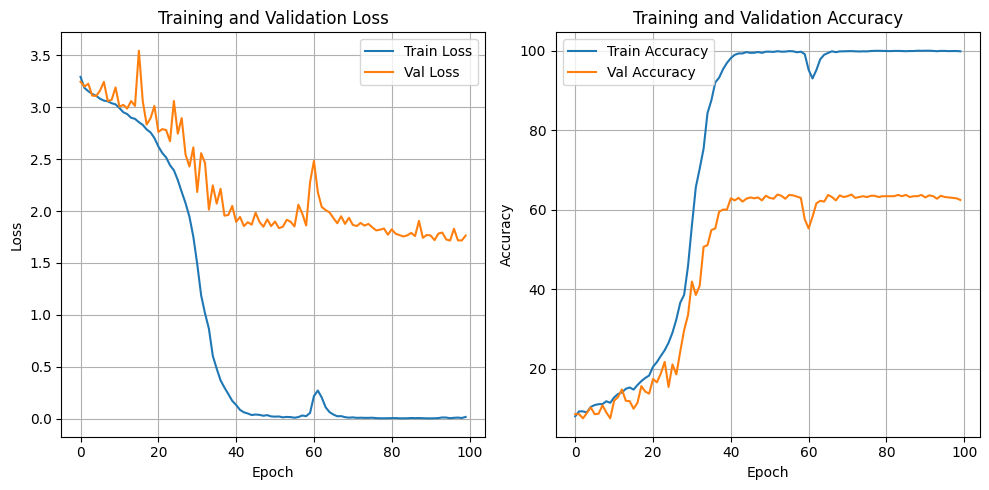

,epoch,Train Acc,Train Loss,Val Acc,Val Loss
0,1,8.083538,3.291836,8.622503,3.245087
1,2,9.336609,3.185947,8.622503,3.198747
2,3,9.312039,3.153689,7.570978,3.225753
3,4,9.066339,3.127509,8.937960,3.111717
4,5,10.442260,3.109712,10.304942,3.107517
...,...,...,...,...,...
95,96,99.926290,0.005755,63.196635,1.715781
96,97,99.877150,0.009593,63.091483,1.830147
97,98,99.901720,0.011737,62.986330,1.718449
98,99,99.901720,0.007828,62.881178,1.716350


Model saved at epoch 100


In [ ]:
# 파라미터설정
LR = 0.001
BATCH_SIZE = 64
NUM_EPOCHS = 100
WEIGHT_DECAY = 5e-4

# 실험 이름, 저장 경로 설정
EXP_NAME = 'best_acc_exp'
SAVE_DIR = "Mission1"

# 데이터 로드
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
val_transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
data_loader = data_loading(
    tensor_dir='dataset/tensor/resize_tensor',
    batch_size=BATCH_SIZE,
    train_transform=train_transform,
    val_transform=val_transform
)

# ResNet18 모델 불러오기(가중치 X)
model = models.resnet18(weights=None, num_classes=31)
model = model.to(device)

# 학습
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)

#
training(
    experiment_name=EXP_NAME,
    save_dir=SAVE_DIR,
    data_loader=data_loader,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler
)

#### 2. Best Loss (Mission3-2 사용)
**Mission3-2 에서 특징 추출을 위한 목적으로 사용됩니다.**


Train Dataset: 4070, Val Dataset: 951


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [1/50], Train Loss: 3.2918, Train Acc: 8.08%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [1/50], Val Loss: 3.2451, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [2/50], Train Loss: 3.1859, Train Acc: 9.34%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [2/50], Val Loss: 3.1987, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [3/50], Train Loss: 3.1537, Train Acc: 9.31%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [3/50], Val Loss: 3.2258, Val Acc: 7.57%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [4/50], Train Loss: 3.1275, Train Acc: 9.07%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [4/50], Val Loss: 3.1117, Val Acc: 8.94%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [5/50], Train Loss: 3.1097, Train Acc: 10.44%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [5/50], Val Loss: 3.1075, Val Acc: 10.30%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [6/50], Train Loss: 3.0818, Train Acc: 10.91%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [6/50], Val Loss: 3.1590, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [7/50], Train Loss: 3.0633, Train Acc: 11.13%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [7/50], Val Loss: 3.2435, Val Acc: 8.73%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [8/50], Train Loss: 3.0566, Train Acc: 11.15%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [8/50], Val Loss: 3.0601, Val Acc: 10.83%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [9/50], Train Loss: 3.0382, Train Acc: 11.87%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [9/50], Val Loss: 3.0709, Val Acc: 9.04%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [10/50], Train Loss: 3.0268, Train Acc: 11.47%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [10/50], Val Loss: 3.1901, Val Acc: 7.57%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [11/50], Train Loss: 3.0122, Train Acc: 12.80%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [11/50], Val Loss: 3.0348, Val Acc: 11.25%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [12/50], Train Loss: 2.9758, Train Acc: 12.85%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [12/50], Val Loss: 3.1681, Val Acc: 11.78%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [13/50], Train Loss: 2.9698, Train Acc: 13.02%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [13/50], Val Loss: 3.1099, Val Acc: 9.57%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [14/50], Train Loss: 2.9270, Train Acc: 14.50%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [14/50], Val Loss: 3.2720, Val Acc: 8.62%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [15/50], Train Loss: 2.9132, Train Acc: 14.47%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [15/50], Val Loss: 2.9930, Val Acc: 12.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [16/50], Train Loss: 2.8835, Train Acc: 14.72%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [16/50], Val Loss: 3.4139, Val Acc: 11.46%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [17/50], Train Loss: 2.8584, Train Acc: 15.70%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [17/50], Val Loss: 3.1209, Val Acc: 11.78%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [18/50], Train Loss: 2.8288, Train Acc: 15.77%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [18/50], Val Loss: 2.9293, Val Acc: 14.09%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [19/50], Train Loss: 2.7936, Train Acc: 16.12%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [19/50], Val Loss: 2.8322, Val Acc: 16.82%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [20/50], Train Loss: 2.7467, Train Acc: 17.32%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [20/50], Val Loss: 3.2619, Val Acc: 12.72%
Model saved at epoch -> 20


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [21/50], Train Loss: 2.5913, Train Acc: 21.65%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [21/50], Val Loss: 2.6374, Val Acc: 21.98%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [22/50], Train Loss: 2.4718, Train Acc: 24.91%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [22/50], Val Loss: 2.5904, Val Acc: 23.66%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [23/50], Train Loss: 2.3967, Train Acc: 26.81%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [23/50], Val Loss: 2.5349, Val Acc: 24.71%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [24/50], Train Loss: 2.3303, Train Acc: 28.60%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [24/50], Val Loss: 2.5111, Val Acc: 24.50%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [25/50], Train Loss: 2.2680, Train Acc: 30.96%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [25/50], Val Loss: 2.4444, Val Acc: 28.50%
Model saved at epoch -> 25


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [26/50], Train Loss: 2.1860, Train Acc: 33.19%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [26/50], Val Loss: 2.4172, Val Acc: 27.87%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [27/50], Train Loss: 2.0888, Train Acc: 36.88%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [27/50], Val Loss: 2.3565, Val Acc: 30.39%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [28/50], Train Loss: 1.9911, Train Acc: 41.35%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [28/50], Val Loss: 2.2817, Val Acc: 35.23%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [29/50], Train Loss: 1.8681, Train Acc: 43.76%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [29/50], Val Loss: 2.3246, Val Acc: 33.23%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [30/50], Train Loss: 1.7188, Train Acc: 50.07%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [30/50], Val Loss: 2.2529, Val Acc: 37.43%
Model saved at epoch -> 30


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [31/50], Train Loss: 1.5857, Train Acc: 55.41%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [31/50], Val Loss: 2.1496, Val Acc: 41.54%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [32/50], Train Loss: 1.4051, Train Acc: 62.38%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [32/50], Val Loss: 2.1051, Val Acc: 45.43%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [33/50], Train Loss: 1.2533, Train Acc: 68.01%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [33/50], Val Loss: 1.9971, Val Acc: 45.74%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [34/50], Train Loss: 1.0661, Train Acc: 75.01%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [34/50], Val Loss: 1.9793, Val Acc: 50.89%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [35/50], Train Loss: 0.8798, Train Acc: 81.84%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [35/50], Val Loss: 1.9858, Val Acc: 51.52%
Model saved at epoch -> 35


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [36/50], Train Loss: 0.7236, Train Acc: 86.54%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [36/50], Val Loss: 1.8308, Val Acc: 55.42%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [37/50], Train Loss: 0.5654, Train Acc: 91.28%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [37/50], Val Loss: 1.7918, Val Acc: 59.41%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [38/50], Train Loss: 0.4457, Train Acc: 94.08%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [38/50], Val Loss: 1.7235, Val Acc: 60.67%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [39/50], Train Loss: 0.3453, Train Acc: 96.68%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [39/50], Val Loss: 1.7110, Val Acc: 60.78%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [40/50], Train Loss: 0.2569, Train Acc: 97.81%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [40/50], Val Loss: 1.7076, Val Acc: 61.93%
Model saved at epoch -> 40


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [41/50], Train Loss: 0.1794, Train Acc: 98.89%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [41/50], Val Loss: 1.5368, Val Acc: 62.15%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [42/50], Train Loss: 0.1389, Train Acc: 99.29%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [42/50], Val Loss: 1.5244, Val Acc: 62.67%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [43/50], Train Loss: 0.1298, Train Acc: 99.43%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [43/50], Val Loss: 1.5173, Val Acc: 62.67%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [44/50], Train Loss: 0.1197, Train Acc: 99.53%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [44/50], Val Loss: 1.5095, Val Acc: 63.20%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [45/50], Train Loss: 0.1066, Train Acc: 99.63%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [45/50], Val Loss: 1.5105, Val Acc: 63.20%
Model saved at epoch -> 45


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [46/50], Train Loss: 0.1056, Train Acc: 99.71%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [46/50], Val Loss: 1.5112, Val Acc: 62.67%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [47/50], Train Loss: 0.1021, Train Acc: 99.61%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [47/50], Val Loss: 1.5080, Val Acc: 62.88%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [48/50], Train Loss: 0.0953, Train Acc: 99.68%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [48/50], Val Loss: 1.5056, Val Acc: 62.99%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [49/50], Train Loss: 0.0909, Train Acc: 99.75%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [49/50], Val Loss: 1.5046, Val Acc: 63.09%


  0%|          | 0/64 [00:00<?, ?it/s]

Epoch [50/50], Train Loss: 0.0878, Train Acc: 99.75%


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [50/50], Val Loss: 1.5017, Val Acc: 63.20%
Model saved at epoch -> 50


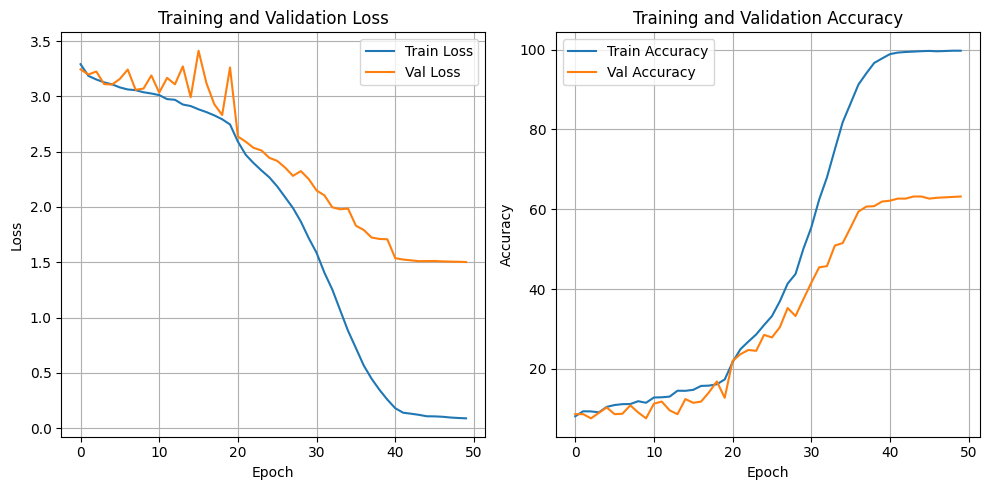

,epoch,Train Acc,Train Loss,Val Acc,Val Loss
0,1,8.083538,3.291836,8.622503,3.245087
1,2,9.336609,3.185947,8.622503,3.198747
2,3,9.312039,3.153689,7.570978,3.225753
3,4,9.066339,3.127509,8.937960,3.111717
4,5,10.442260,3.109712,10.304942,3.107517
5,6,10.909091,3.081762,8.622503,3.158956
6,7,11.130221,3.063327,8.727655,3.243517
7,8,11.154791,3.056645,10.830705,3.060093
8,9,11.867322,3.038169,9.043113,3.070874
9,10,11.474201,3.026791,7.570978,3.190090


Model saved at epoch 50


In [ ]:
# 파라미터설정
LR = 0.001
BATCH_SIZE = 64
NUM_EPOCHS = 50
WEIGHT_DECAY = 5e-4

# 실험 이름, 저장 경로 설정
EXP_NAME = 'best_loss_exp'
SAVE_DIR = "Mission1"

# 데이터 로드
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
val_transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
data_loader = data_loading(
    tensor_dir='dataset/tensor/resize_tensor',
    batch_size=BATCH_SIZE,
    train_transform=train_transform,
    val_transform=val_transform
)

# ResNet18 모델 불러오기(가중치 X)
model = models.resnet18(weights=None, num_classes=31)
model = model.to(device)

# 학습
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

#
training(
    experiment_name=EXP_NAME,
    save_dir=SAVE_DIR,
    data_loader=data_loader,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler
)

### 5. 모델 평가

In [ ]:
# best acc model의 성능 확인

SAVE_DIR = "Mission1"
EXP_NAME = "best_acc_exp"

best_path = f"./{SAVE_DIR}/{EXP_NAME}/best_model.pth"
model.load_state_dict(torch.load(best_path, weights_only=True))

def evaluate_model(model, data_loader):
    model.eval()
    val_loss = 0
    val_correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(data_loader, leave=False):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_loss /= len(data_loader)
        val_acc = 100 * val_correct / total

    print(f"Best Model Performance | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    return np.array(all_preds), np.array(all_labels), val_loss, val_acc

y_pred, y_true, val_loss, val_acc = evaluate_model(model, data_loader[1])

  0%|          | 0/15 [00:00<?, ?it/s]

Best Model Performance | Val Loss: 1.8487, Val Acc: 63.83%


### 6. 결과 분석
**1. 모델이 출력한 결과에 대한 분석입니다.**  

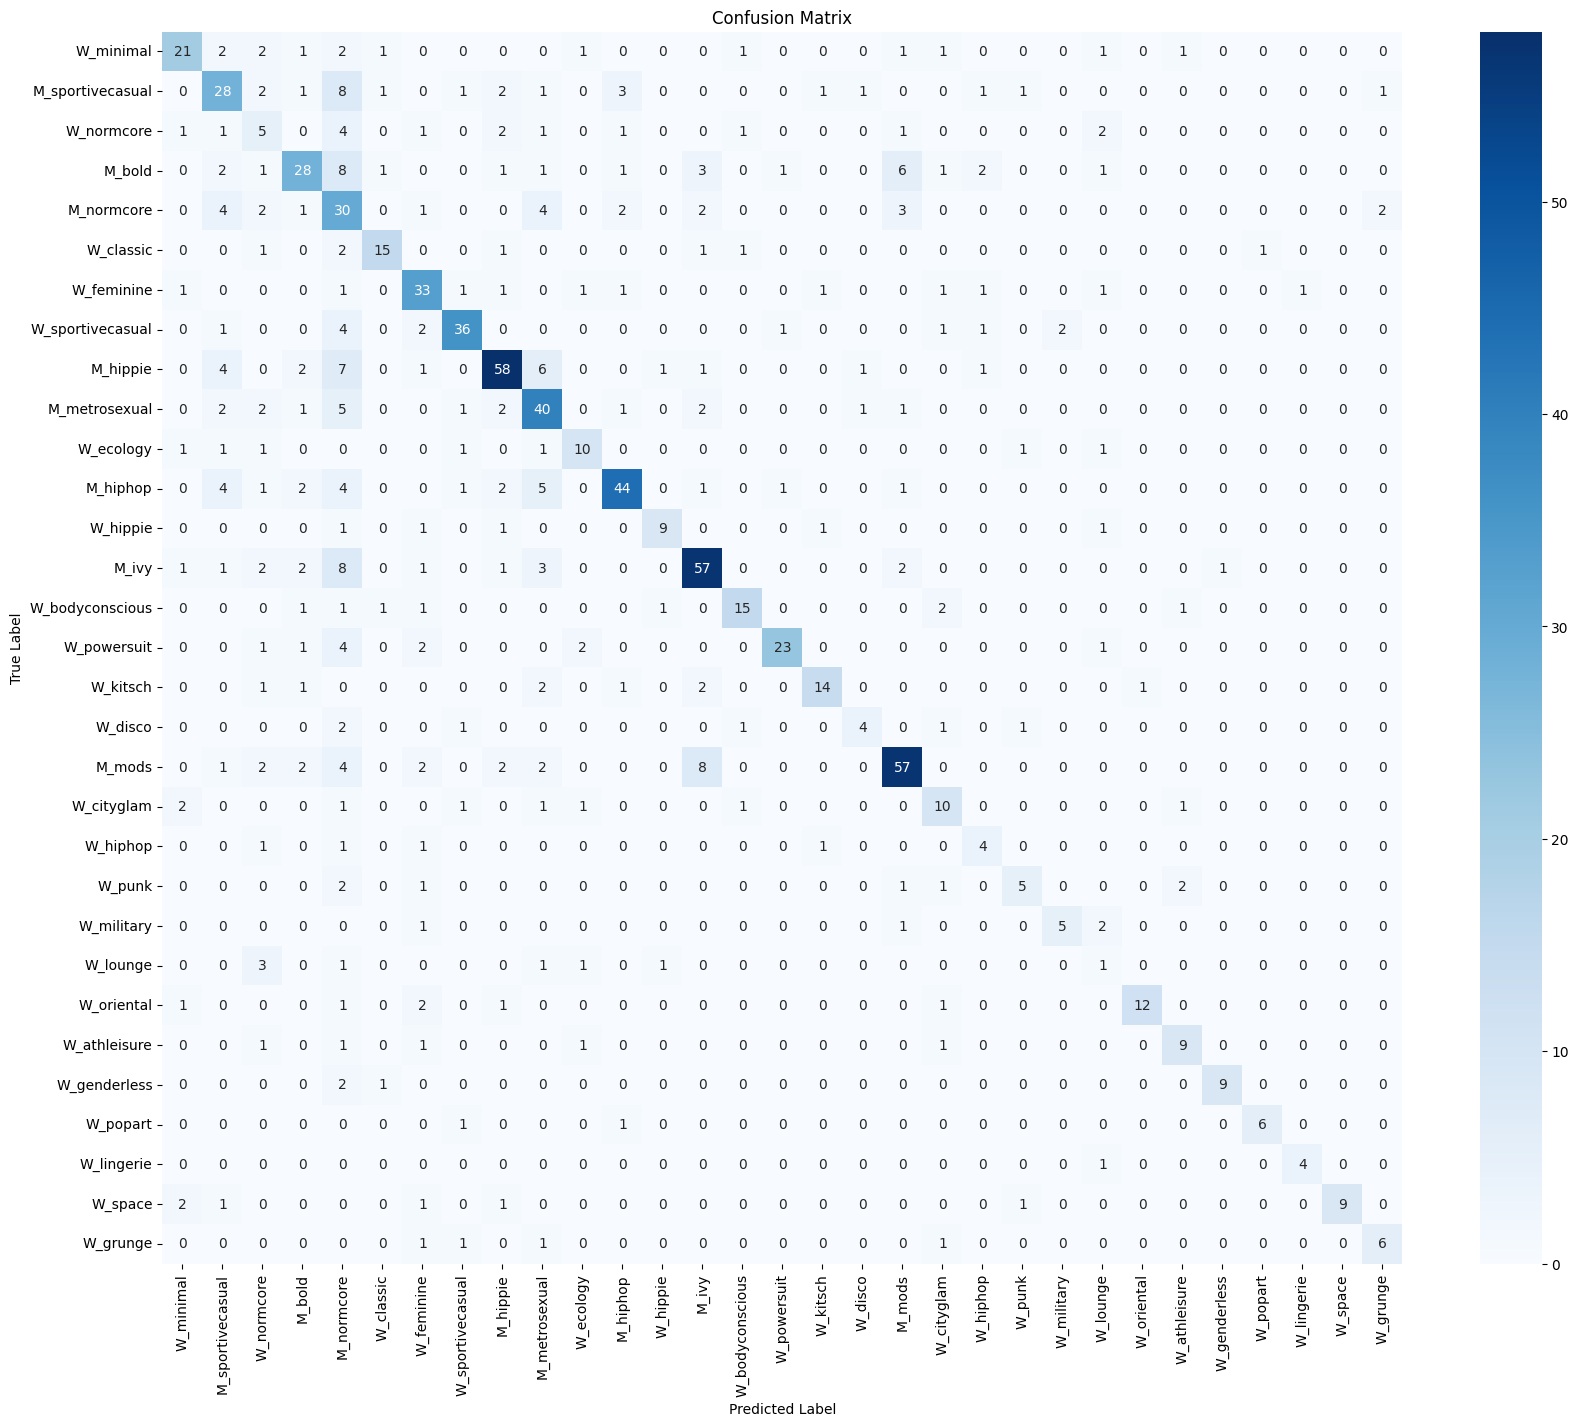

                  precision    recall  f1-score   support

       W_minimal      0.700     0.600     0.646        35
M_sportivecasual      0.538     0.538     0.538        52
      W_normcore      0.179     0.250     0.208        20
          M_bold      0.651     0.491     0.560        57
      M_normcore      0.288     0.588     0.387        51
       W_classic      0.750     0.682     0.714        22
      W_feminine      0.623     0.750     0.680        44
W_sportivecasual      0.800     0.750     0.774        48
        M_hippie      0.773     0.707     0.739        82
   M_metrosexual      0.580     0.690     0.630        58
       W_ecology      0.588     0.588     0.588        17
        M_hiphop      0.800     0.667     0.727        66
        W_hippie      0.750     0.643     0.692        14
           M_ivy      0.740     0.722     0.731        79
 W_bodyconscious      0.750     0.652     0.698        23
     W_powersuit      0.885     0.676     0.767        34
        W_kit

In [ ]:
# 어떤 class를 분류 못 하는지 확인
import json
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 매트릭 히스토그램 시각화
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(20, 16))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'{SAVE_DIR}/{EXP_NAME}/pred_heatmap.png', bbox_inches='tight')
    plt.show()

# 결과 메트릭
def print_classification_report(y_true, y_pred, classes):
    report = classification_report(y_true, y_pred, target_names=classes, digits=3)
    print(report)

# 라벨 맵 로드
label_map_ev = json.load(open('./dataset/label_map.json'))

# 출력
class_names = [label_map_ev[str(i)] for i in range(31)]
plot_confusion_matrix(y_true, y_pred, class_names)
print_classification_report(y_true, y_pred, class_names)

In [ ]:
# 가장 성능이 낮은 클래스 10개 출력
class_accuracy = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
class_accuracy = {k: v['f1-score'] for k, v in class_accuracy.items() if k in class_names}
worst_classes = sorted(class_accuracy.items(), key=lambda x: x[1])

print("Worst performing classes:")
for i, (cls, score) in enumerate(worst_classes):
    print(f"{cls}: {score:.3f}")
    if i == 9:
        print("==================================================")

Worst performing classes:
W_lounge: 0.100
W_normcore: 0.208
M_normcore: 0.387
W_hiphop: 0.444
W_disco: 0.471
W_punk: 0.476
W_cityglam: 0.513
M_sportivecasual: 0.538
M_bold: 0.560
W_ecology: 0.588
W_military: 0.625
M_metrosexual: 0.630
W_grunge: 0.632
W_athleisure: 0.643
W_minimal: 0.646
W_feminine: 0.680
W_hippie: 0.692
W_bodyconscious: 0.698
W_kitsch: 0.700
W_classic: 0.714
M_hiphop: 0.727
M_ivy: 0.731
M_hippie: 0.739
M_mods: 0.740
W_space: 0.750
W_powersuit: 0.767
W_sportivecasual: 0.774
W_oriental: 0.774
W_popart: 0.800
W_lingerie: 0.800
W_genderless: 0.818
